<h1><center> About the MNIST dataset</center></h1>

In our previous notebook, we looked at how to read in the MNIST Dataset from the zip files provided on the MNIST website. Now that we have the image files, we can start to create our neural network that will take in an image from the MNIST dataset and tell us what the number in the image is without using the labels set. 

We can do this in steps, similar to our Iris datset. The first step will be to create the neural network. In this example, we already know how to read and save the images contained in the dataset, so let's use TensorFlow's built in MNIST dataset so we don't have to repeat this operation in this notebook also.

![ml_map.png](attachment:ml_map.png)

<h1><center> MNIST - Linear Classifier</center></h1>

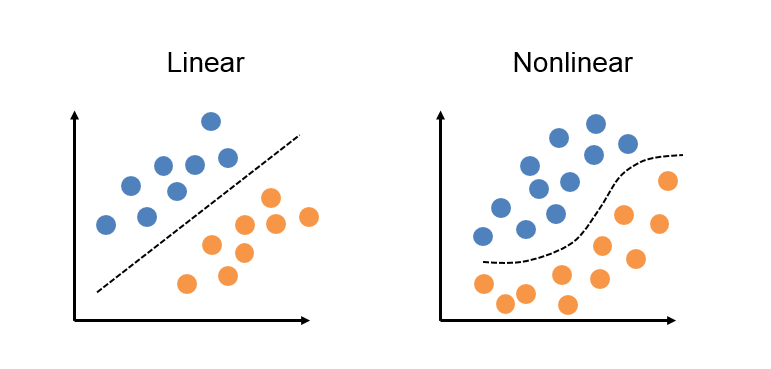

<h1>1. Setup data</h1>

In [1]:
# Import os
import os

# Supress warnings but don't supress errors
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Import numpy
import numpy as np

# Import tensorflow as tf
import tensorflow as tf

# Supress the warnings even more
tf.logging.set_verbosity(tf.logging.ERROR)

# Import matplotlib as plt
import matplotlib.pyplot as plt

# Import the mnist dataSet from TensorFlow
from tensorflow.examples.tutorials.mnist import input_data

# Load the mnist dataset from TensorFlow
mnist = input_data.read_data_sets("MNIST_data")

# Shorten tf.contrib.learn to just 'learn'
learn = tf.contrib.learn

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


<h1>2. Create training and test set</h1>

 * Training Set - 55,000 images
 * Test Set - 10,000 images

In [2]:
# Define trainData as the training set of images from MNIST
trainData = mnist.train.images

# Define trainLabels as the training set of labels from MNIST
trainLabels = np.asarray(mnist.train.labels, dtype=np.int32)

# Define testData as the testing set of images from MNIST
testData = mnist.test.images

# Define testData as the testing set of images from MNIST
testLabels = np.asarray(mnist.test.labels, dtype=np.int32)

Let's show an image from the data we just loaded in to make sure everything is working properly. Let's create a function that will do this incase we need to display an image again later on.

In [3]:
def displayImage(i):
    img = testData[i]
    plt.title('Image: %d Label: %d' % (i, testLabels[i]))
    plt.imshow(img.reshape(28,28), cmap=plt.cm.gray_r)

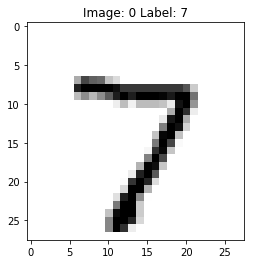

In [4]:
displayImage(0)

Okay, so now we have the dataset set-up correctly. We know this as in our previous notebook, the first image from the MNIST dataset is a 7 and passing in a value of 0 (the first image in the dataset) to our displayImage() function, we can see it shows a seven correctly. Our next step is to create a classifier for our dataset.

<h1>
3. Create Classifier
</h1>

For this example, we are going to use a linear classififer. Now, you may be asking yourself. What is a linear classifier and why are we using it in this example? I think this is important to understand so I am going to include some information at the end of this notebook explaining how a linear classifier works and why we chose it.

In [5]:
# Create a variable called feature_columns
# https://www.tensorflow.org/guide/feature_columns
feature_columns = learn.infer_real_valued_columns_from_input(trainData)

# Create our classifier using TensorFlow's LinearClassifier function
# We give this classifier 10 classes as the there are 10 outputs for our dataset (0..9)
linearClassifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)

# Tell TensorFlow to fit the classifier with the training set and corresponding labels in batches of 100 and steps of 1000
# https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#fit
linearClassifier.fit(trainData, trainLabels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000002187374BFD0>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

<h1>
4. Evaluate Accuracy
</h1>

In [6]:
# Evaluate the accuray of our classifier after using the fit function above
# https://www.tensorflow.org/api_docs/python/tf/contrib/learn/evaluate
# Print the accuracy of our fit method as a percentage
percentageAccuracy = (linearClassifier.evaluate(testData, testLabels)["accuracy"])
print("\nTest Accuracy: {0:f}%\n".format(percentageAccuracy*100))


Test Accuracy: 92.159998%





We can see the accuracy lies at around 90 percent. This is good and a better score could be achieved by using deep learning. For now, we are happy with this score so let's see if it actually is accurate by using TensorFlows predict function a few images that we know the correct output.


<h1>
5. Test with sample images
</h1>

Predicted:  [7]


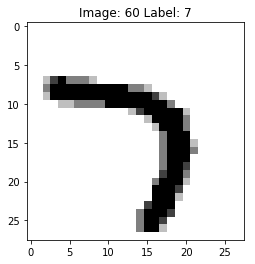

In [16]:
# Create a varible that can we can change easily to select an image
imageNum = 60

# Make a prediction using Tensorflow and our classifier we created above from our testData
prediction = linearClassifier.predict(np.array([testData[imageNum]], dtype=float), as_iterable=False)

# Print our prediction and display the actual image we are trying to predict
print("Predicted: ", prediction)
displayImage(imageNum)

Predicted:  [5]


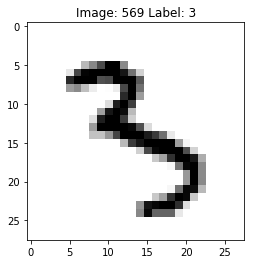

In [8]:
# Create a varible that can we can change easily to select an image
imageNum = 569

# Make a prediction using Tensorflow and our classifier we created above from our testData
prediction = linearClassifier.predict(np.array([testData[imageNum]], dtype=float), as_iterable=False)

# Print our prediction and display the actual image we are trying to predict
print("Predicted: ", prediction)
displayImage(imageNum)

Predicted:  [4]


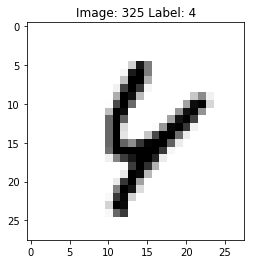

In [9]:
# Create a varible that can we can change easily to select an image
imageNum = 325

# Make a prediction using Tensorflow and our classifier we created above from our testData
prediction = linearClassifier.predict(np.array([testData[imageNum]], dtype=float), as_iterable=False)

# Print our prediction and display the actual image we are trying to predict
print("Predicted: ", prediction)
displayImage(imageNum)

Predicted:  [6]


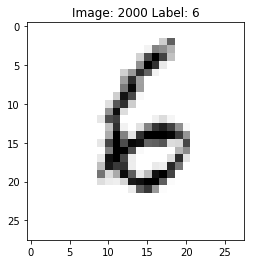

In [10]:
# Create a varible that can we can change easily to select an image
imageNum = 2000

# Make a prediction using Tensorflow and our classifier we created above from our testData
prediction = linearClassifier.predict(np.array([testData[imageNum]], dtype=float), as_iterable=False)

# Print our prediction and display the actual image we are trying to predict
print("Predicted: ", prediction)
displayImage(imageNum)

Predicted:  [0]


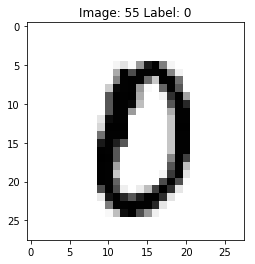

In [96]:
# Create a varible that can we can change easily to select an image
imageNum = 55

# Make a prediction using Tensorflow and our classifier we created above from our testData
prediction = linearClassifier.predict(np.array([testData[imageNum]], dtype=float), as_iterable=False)

# Print our prediction and display the actual image we are trying to predict
print("Predicted: ", prediction)
displayImage(imageNum)


Sucess!

From the 5 sample images, we can see that our linear classififer is working correctly. However, we can increase this percentage accuracy by using a DNN Classifier instead of a Linear one, let's see how we can do this below.

<h1><center> MNIST - Deep Neural Network Classifier</center></h1>

*** NOTE - DUE TO THE NATURE OF NEURAL NETWORKS, THE FOLLOWING CODE BELOW MAY APPEAR TO BE HANGING/CRASHING BUT IT IS NOT, CHECK THE ICON OF THE JUPTYER NOTEBOOK TAB YOU HAVE OPEN, IF IT APPEARS AS AN HOURGLASS THE OPERATION IS STILL BEING PERFORMED. PLEASE WAIT A COUPLE OF MINUTES FOR THE OPERATION TO COMPLETE ****



Running =  


Completed = 


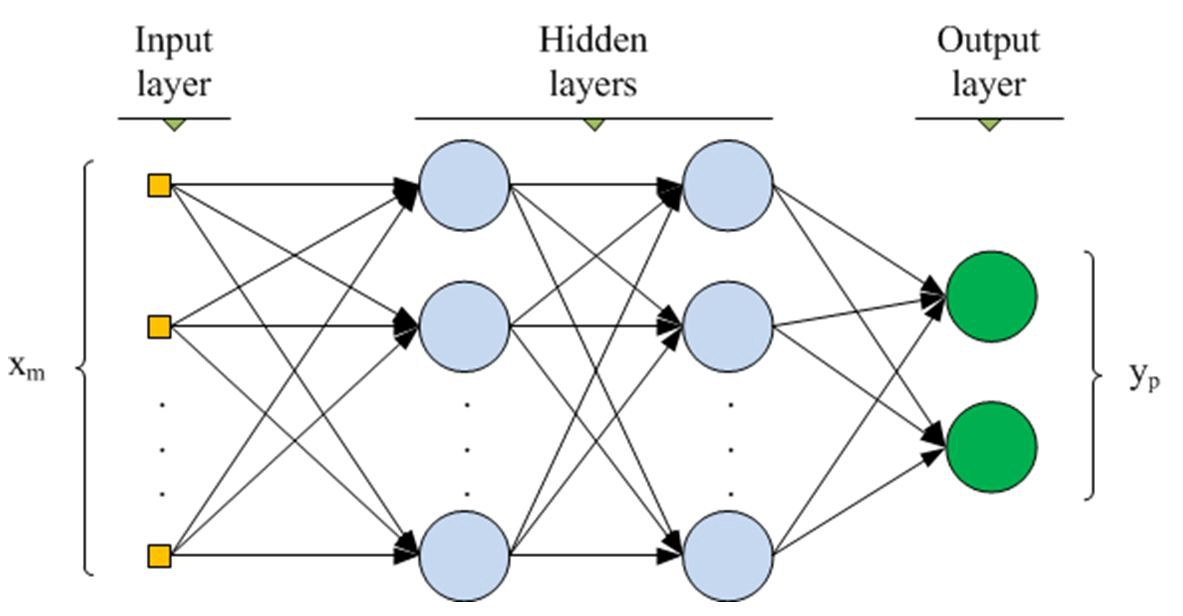

<h1>1. Setup data</h1>

In [12]:
# Import numpy
import numpy as np

# Import tensorflow as tf
import tensorflow as tf

# Import matplotlib as plt
import matplotlib.pyplot as plt

# Import the mnist dataSet from TensorFlow
from tensorflow.examples.tutorials.mnist import input_data

# Load the mnist dataset from TensorFlow
mnist = input_data.read_data_sets('MNIST_data')

# Create a function to easily get our images and labels from the MNIST dataset
def input(dataset):
    return dataset.images, dataset.labels.astype(np.int32)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


<h1>2. Create Classifier</h1>

For this example, we are going to use a <b>DNN classififer</b>. This method is a bit more complicated and less simplified than the Linear approach. If you are unsure what is going on here, please refer to my other notebook where I explaina all the concepts discussed in this notebook.

In [13]:
# Create a variable called feature_columns
# Reshape the with a shape of 28x28 as this represents the pixel dimensions of our images
# https://www.tensorflow.org/guide/feature_columns
feature_columns = [tf.feature_column.numeric_column("mnistData", shape=[28, 28])]

# Create our classifier using TensorFlow's DNNClassifier function
# We give this classifier 10 classes as the there are 10 outputs for our dataset (0..9)
# I'll discuss this in more detail in the next notebook
# https://www.tensorflow.org/api_docs/python/tf/contrib/learn/DNNClassifier
dnnClassifier = tf.estimator.DNNClassifier(
                     feature_columns=feature_columns,
                     hidden_units=[256, 32],
                     optimizer=tf.train.AdamOptimizer(1e-4),
                     n_classes=10,
                     dropout=0.1,
                     model_dir="./tmp/mnist_model"
                    )

<h1>3. Create training and test set</h1>

* <b>Training Set - 55,000 images<b>
* <b>Test Set - 10,000 images<b>

In [106]:
# Combine the training data and labels into one variable
trainingData = tf.estimator.inputs.numpy_input_fn(
    x={"mnistData": input(mnist.train)[0]},
    y=input(mnist.train)[1],
    num_epochs=None,
    batch_size=100,
    shuffle=True
)

print(input(mnist.test)[1][55])
print(input(mnist.test)[0][55])


# Combine the test images and test labels into one variable
testingData = tf.estimator.inputs.numpy_input_fn(
    x={"mnistData": input(mnist.test)[0]},
    y=input(mnist.test)[1],
    num_epochs=1,
    shuffle=False
)



0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.       

## Now we have variables for our trainingData and our testData, let's train the model and see how accurately our model is able to predict the images in the dataset.

<h1>4. Train model and show accuracy</h1>

In [15]:
# Tell TensorFlow to train the classifier with the training set and corresponding labels in steps of 100
# https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#fit
dnnClassifier.train(input_fn=trainingData, steps=1000)

# Print the accuracy of our fit method as a percentage
# https://www.tensorflow.org/api_docs/python/tf/contrib/learn/evaluate
percentageAccuracy = (dnnClassifier.evaluate(input_fn=testingData)["accuracy"])
print("\nTest Accuracy: {0:f}%\n".format(percentageAccuracy*100))


Test Accuracy: 95.749998%



We can see the accuracy lies at around 90 percent. This is good and a better score could be achieved by using deep learning. For now, we are happy with this score so let's see if it actually is accurate by using TensorFlows predict function a few images that we know the correct output.

<h2>Sucess!</h2> 

Using a DNN Classifier instead of a Linear Classifier we were able to increase our accuracy score to 98 percent, which I am very happy with. Iny my next notebook, I will be discussing why I chose these classifiers and how they work.

<h3> References</h3>

* [Classifying Handwritten Digits with TF.Learn - Machine Learning Recipes](https://www.youtube.com/watch?v=Gj0iyo265bc)

* [MNIST Website](http://yann.lecun.com/exdb/mnist/)

* [Handling the MNIST Datset](https://github.com/datapythonista/mnist)

* [Writing images using OpenCV](https://docs.opencv.org/2.4/doc/tutorials/introduction/load_save_image/load_save_image.html)

* [Classifying the MNIST Dataset using a DNN](https://codeburst.io/use-tensorflow-dnnclassifier-estimator-to-classify-mnist-dataset-a7222bf9f940)